In [3]:

import os
import h5py as h5

import numpy as np

import matplotlib.pyplot as plt

In [21]:
path_seg = "../data/pore-detection/Pinnrpobe_komplett/Binarisiertes_Volumen/Probe_Maskierung.h5"
path_data = "../data/pore-detection/Pinnrpobe_komplett/Grauwertvolumen/Pinnprobe_Grauwerte.hdf"

assert  os.path.exists(path_data), os.path.exists(path_seg)

In [24]:
with h5.File(os.path.join(path_seg),"r") as f:
    print(f.keys())
    for key in f.keys():
        print(key)
        print(f[key].shape)

<KeysViewHDF5 ['data']>
data
(833, 207, 802)


In [29]:
# Define the file path and data type
file_path = "../data/pore-detection/Pinnrpobe_komplett/Grauwertvolumen/Pinnprobe_Grauwerte.raw"
dtype = np.uint16  # Change this to the appropriate data type (e.g., np.uint8, np.int16, etc.)
shape = (833, 207, 802)  # Define the shape of the array (e.g., (height, width))

In [30]:

# Read the binary data from the file into a NumPy array
try:
    with open(file_path, 'rb') as file:
        raw_data = np.fromfile(file, dtype=dtype)
        # If you have a specific shape, reshape the array accordingly
        if shape:
            raw_data = raw_data.reshape(shape)
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
    raw_data = None

if raw_data is not None:
    # Now you have your data in a NumPy array (raw_data)
    print(raw_data.shape,raw_data.dtype,raw_data.nbytes/1024**2)

(833, 207, 802) uint16 263.76659774780273


In [31]:
with h5.File(os.path.join(path_seg),"r") as f:
    seg = f["data"][:]



In [32]:
np.unique(seg)

array([0., 1.])

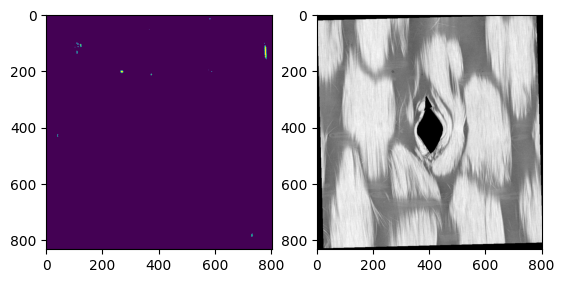

In [36]:
slice = 100

fig, axs = plt.subplots(1,2)
axs =axs.flatten()
axs[0].imshow(seg[:,slice,:])
axs[1].imshow(raw_data[:,slice,:],cmap="gray")

In [39]:
raw = raw_data
labels = seg



obj_ids = np.unique(labels)
obj_ids = obj_ids[0:]
masks = labels == obj_ids[:, None, None, None]

out = {}
out['raw'] = raw
out['labels'] = labels
out['masks'] = masks

In [47]:
fout = "../data/pore-detection/Pinnrpobe_komplett/pinnprobe_01.h5"
with h5.File(fout, 'w') as fout:
    for key in out.keys():
        fout.create_dataset(key, data = out[key])

In [48]:
np.unique(masks)

array([False,  True])

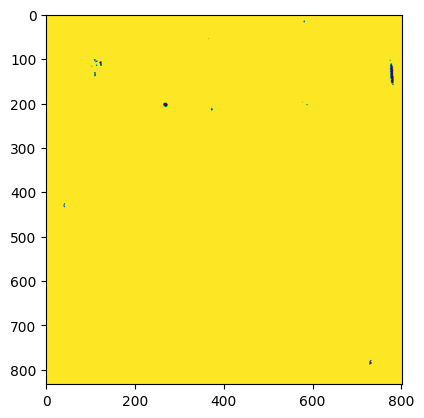

In [43]:
plt.imshow(masks[0,:,slice,:])